<a href="https://colab.research.google.com/github/Nouran-saad/Stroke_Prediction_DT_Kmeans/blob/main/Team4_18p4496_DataMiningProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Course Name & Code:Data Mining and Business Intelligence CSE 382
# Team: 4
# Name: Nouran Ahmed Abd Elhameed Mohamed
#ID :18p4496

## Import all needed Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Read the stroke dataset (downloaded from kaggle.com)

In [3]:
stroke_data = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [4]:
stroke_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


# Data Preprocessing

### drop column id has no meaning in prediction

In [5]:
stroke_data = stroke_data.drop('id', axis=1)

### Check if there is any NULL (how many and which attributes)

In [6]:
stroke_data.isnull().values.sum()

201

In [7]:
stroke_data.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

 ###  heatmap to see graphically where we are missing data.

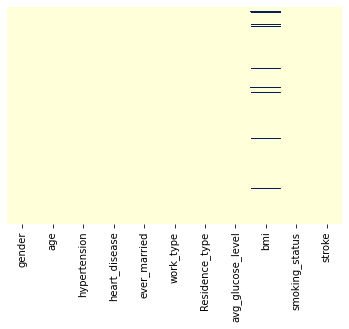

In [8]:
sns.heatmap(stroke_data.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')
plt.show()

### information about 'bmi' attribute to know the mean for some preprocessing

In [9]:
stroke_data['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

### replace any null values with the **mean** of the attribute 
### check if there no null value exist and graph it (heatmap)

In [10]:
stroke_data['bmi'].fillna(stroke_data['bmi'].mean(), inplace = True)

In [11]:
stroke_data.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

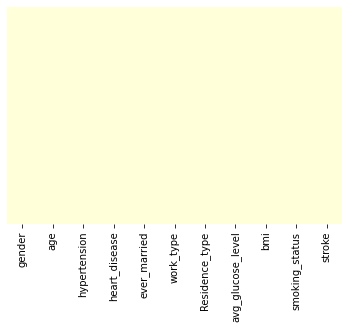

In [12]:
sns.heatmap(stroke_data.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

### drop any record has value 'others' in gender because it has no meaning

In [13]:
stroke_data[stroke_data['gender']=='Other']

gender   age  hypertension  heart_disease ever_married work_type  \
3116  Other  26.0             0              0           No   Private   

     Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
3116          Rural             143.33  22.4  formerly smoked       0

In [14]:
stroke_data.drop(labels=3116,axis=0,inplace=True)

### check if any 'other' value in gender successfully dropped 

In [15]:
stroke_data['gender'].value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

### Check if there is any duplicate data and seems it has no duplicate so we don't need to handle it.

In [16]:
stroke_data.duplicated().values.sum()

0

### Explore the data to find the outliers in the numerical attributres


*   age doesn't have any outliers
*   avg_glucose_level and bmi atrributes have outliers 


In [17]:
stroke_data

gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1     Female  61.0             0              0          Yes  Self-employed   
2       Male  80.0             0              1          Yes        Private   
3     Female  49.0             0              0          Yes        Private   
4     Female  79.0             1              0          Yes  Self-employed   
...      ...   ...           ...            ...          ...            ...   
5105  Female  80.0             1              0          Yes        Private   
5106  Female  81.0             0              0          Yes  Self-employed   
5107  Female  35.0             0              0          Yes  Self-employed   
5108    Male  51.0             0              0          Yes        Private   
5109  Female  44.0             0              0          Yes       Govt_job   

     Residence_type  avg_glucose_level        bmi   smoking_status  stroke  
0             Urban             228.69  36.600000  formerly smoked       1  
1             Rural             202.21  28.893237     never smoked       1  
2             Rural             105.92  32.500000     never smoked       1  
3             Urban             171.23  34.400000           smokes       1  
4             Rural             174.12  24.000000     never smoked       1  
...             ...                ...        ...              ...     ...  
5105          Urban              83.75  28.893237     never smoked       0  
5106          Urban             125.20  40.000000     never smoked       0  
5107          Rural              82.99  30.600000     never smoked       0  
5108          Rural             166.29  25.600000  formerly smoked       0  
5109          Urban              85.28  26.200000          Unknown       0  

[5109 rows x 11 columns]

### Unbalanced output can be happened because of the outliers so we show the box plot with the outliers and we handle it in some steps later

In [18]:
stroke_data['stroke'].value_counts()

0    4860
1     249
Name: stroke, dtype: int64

### Pie chart for better visualization of the output feature (stroke)

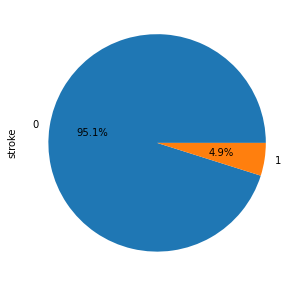

In [19]:
plt.figure(figsize=(5,5))
stroke_data['stroke'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.show()

### Boxplot to see the oultiers to analyze it to show how we can handle it 
### **Note**: i suggest doing smote() to oversample and make the output balanced but in my case i tried it and decrease the accuracy of the model

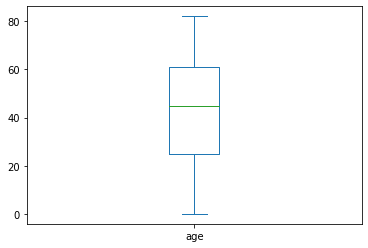

In [20]:
stroke_data['age'].plot(kind = 'box')

plt.show()

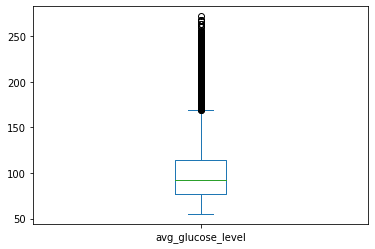

In [21]:
stroke_data['avg_glucose_level'].plot(kind = 'box')

plt.show()

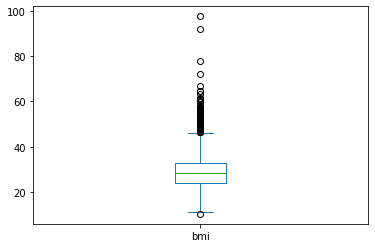

In [22]:
stroke_data['bmi'].plot(kind = 'box')
plt.show()

## Visualize the data

### Show the correaltion between the features ranges from negative one to positive one
### from lighter color (values closer to zero) we deduce there is no correlation between features as we go close to positive one (darker colors) there a strong + correlation between the features (as one increases so does the other) and close to negative one is a strong - correlation (as one increases the other decrease)
### at the diagonal are all one because the features correalted to itself
### **Result** the highest correlation is 33%  between bmi and age and also the age highly correlated with all the features so it's a crtical feature

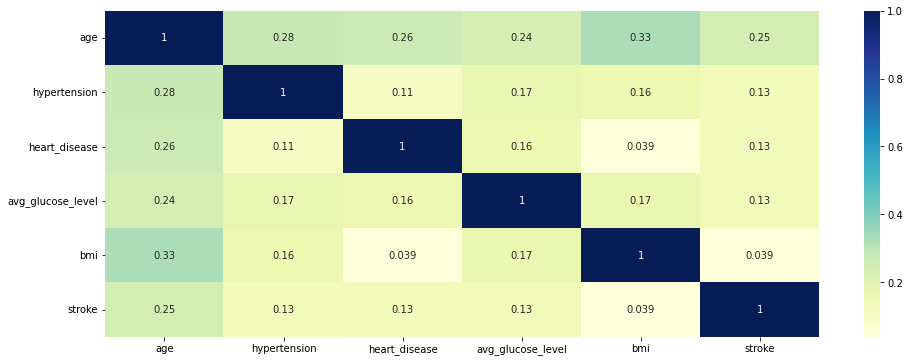

In [23]:
plt.figure(figsize=(16, 6))
correlated_features=stroke_data.corr()
sns.heatmap(correlated_features,cmap='YlGnBu',annot=True)

plt.show()

### Pair plot to better visulazation relationships between the features (understand the pairwise relationship between different variables in a dataset.)

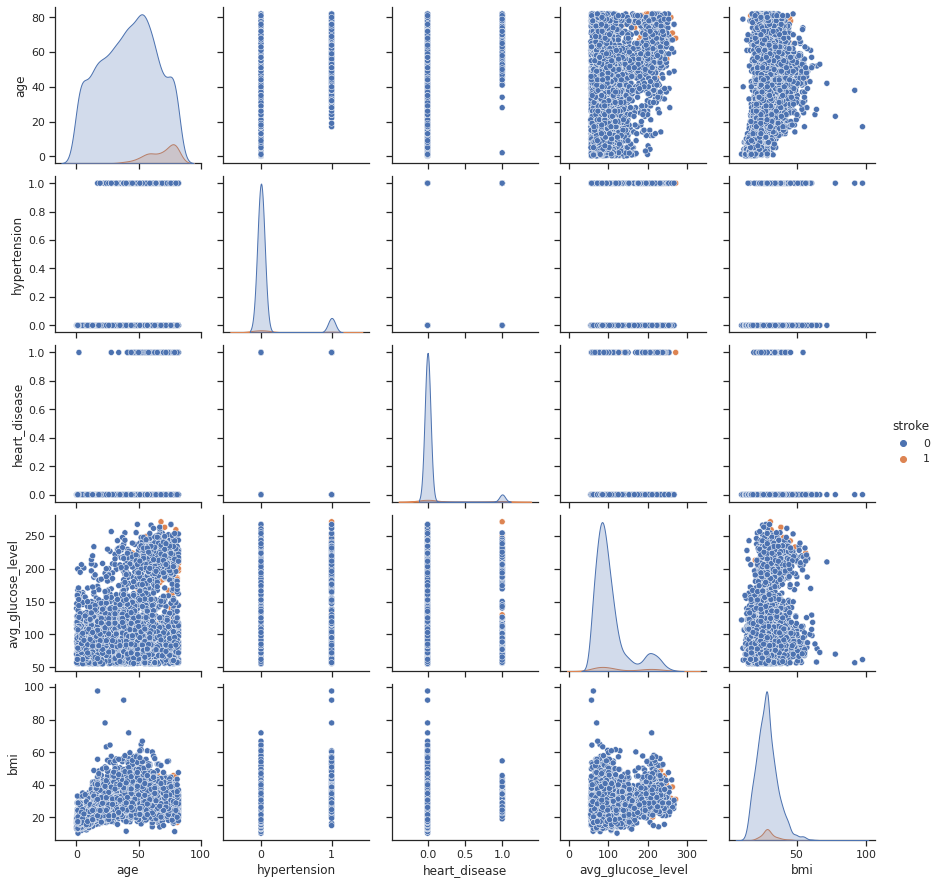

In [24]:
sns.set(style="ticks", color_codes=True)
g=sns.pairplot(stroke_data,hue='stroke')
plt.show()

### Numerical Features Distribution

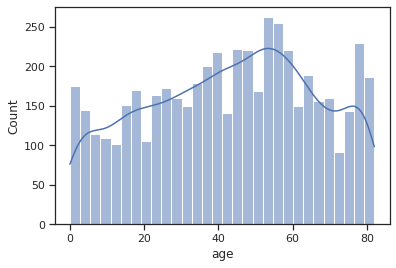

In [25]:
sns.histplot(stroke_data['age'],kde=True,bins=30)
plt.show()

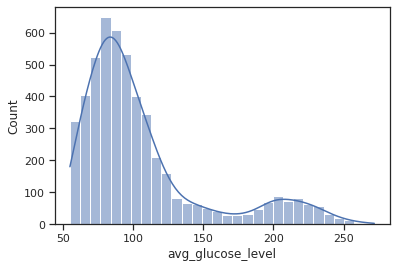

In [26]:
sns.histplot(stroke_data['avg_glucose_level'],kde=True,bins=30)
plt.show()

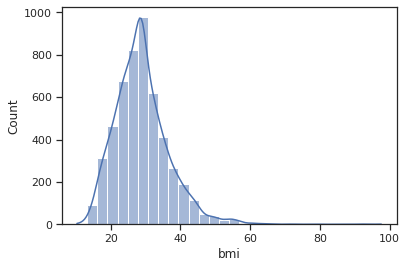

In [27]:
sns.histplot(stroke_data['bmi'],kde=True,bins=30)
plt.show()

### Categorical and binary features distribution

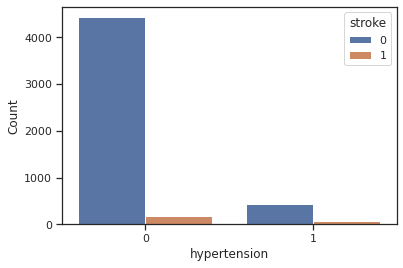

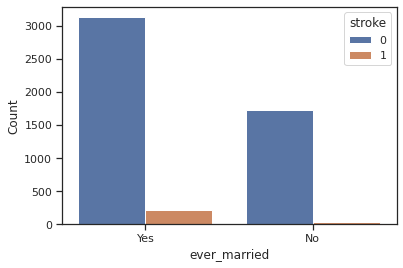

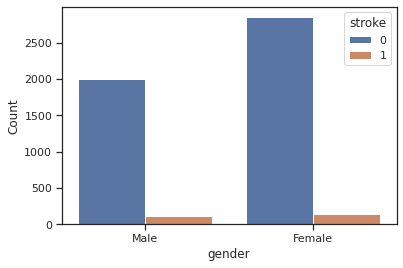

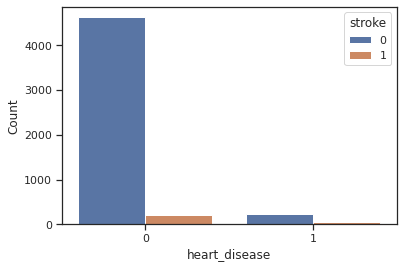

In [28]:
categorical_binary = ['hypertension', 'ever_married','gender','heart_disease']
for i in categorical_binary:
    sns.countplot(x=i , hue= 'stroke', data= stroke_data )

    plt.xlabel(i)
    plt.ylabel('Count')
    plt.show()

### we can see who have previously been diagnosed with hypertension are at a high risk of having a stroke.
#### and also who have previously been diagnosed with heart disease are at a high risk of having a stroke.
### ever married: who have ever married are at a high risk of having a stroke.


# LABEL ENCODING FOR CATEGORIAL DATA
### we need to convert the categorical variables to numbers encoded to 0 or 1 Because the correlationonly understands numerical variables

In [29]:
from sklearn.preprocessing import LabelEncoder
encoding = LabelEncoder()

In [30]:
stroke_data

gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1     Female  61.0             0              0          Yes  Self-employed   
2       Male  80.0             0              1          Yes        Private   
3     Female  49.0             0              0          Yes        Private   
4     Female  79.0             1              0          Yes  Self-employed   
...      ...   ...           ...            ...          ...            ...   
5105  Female  80.0             1              0          Yes        Private   
5106  Female  81.0             0              0          Yes  Self-employed   
5107  Female  35.0             0              0          Yes  Self-employed   
5108    Male  51.0             0              0          Yes        Private   
5109  Female  44.0             0              0          Yes       Govt_job   

     Residence_type  avg_glucose_level        bmi   smoking_status  stroke  
0             Urban             228.69  36.600000  formerly smoked       1  
1             Rural             202.21  28.893237     never smoked       1  
2             Rural             105.92  32.500000     never smoked       1  
3             Urban             171.23  34.400000           smokes       1  
4             Rural             174.12  24.000000     never smoked       1  
...             ...                ...        ...              ...     ...  
5105          Urban              83.75  28.893237     never smoked       0  
5106          Urban             125.20  40.000000     never smoked       0  
5107          Rural              82.99  30.600000     never smoked       0  
5108          Rural             166.29  25.600000  formerly smoked       0  
5109          Urban              85.28  26.200000          Unknown       0  

[5109 rows x 11 columns]

In [31]:
stroke_data['gender'] = encoding.fit_transform(stroke_data['gender'])
stroke_data['ever_married'] = encoding.fit_transform(stroke_data['ever_married'])
stroke_data['work_type'] = encoding.fit_transform(stroke_data['work_type'])
stroke_data['Residence_type'] = encoding.fit_transform(stroke_data['Residence_type'])
stroke_data['smoking_status'] = encoding.fit_transform(stroke_data['smoking_status'])
stroke_data

gender   age  hypertension  heart_disease  ever_married  work_type  \
0          1  67.0             0              1             1          2   
1          0  61.0             0              0             1          3   
2          1  80.0             0              1             1          2   
3          0  49.0             0              0             1          2   
4          0  79.0             1              0             1          3   
...      ...   ...           ...            ...           ...        ...   
5105       0  80.0             1              0             1          2   
5106       0  81.0             0              0             1          3   
5107       0  35.0             0              0             1          3   
5108       1  51.0             0              0             1          2   
5109       0  44.0             0              0             1          0   

      Residence_type  avg_glucose_level        bmi  smoking_status  stroke  
0                  1             228.69  36.600000               1       1  
1                  0             202.21  28.893237               2       1  
2                  0             105.92  32.500000               2       1  
3                  1             171.23  34.400000               3       1  
4                  0             174.12  24.000000               2       1  
...              ...                ...        ...             ...     ...  
5105               1              83.75  28.893237               2       0  
5106               1             125.20  40.000000               2       0  
5107               0              82.99  30.600000               2       0  
5108               0             166.29  25.600000               1       0  
5109               1              85.28  26.200000               0       0  

[5109 rows x 11 columns]

### For the heatmap below, the ever married and age columns have a 0.68 correlation so we can see the correlation of the categorical features after the label encoder

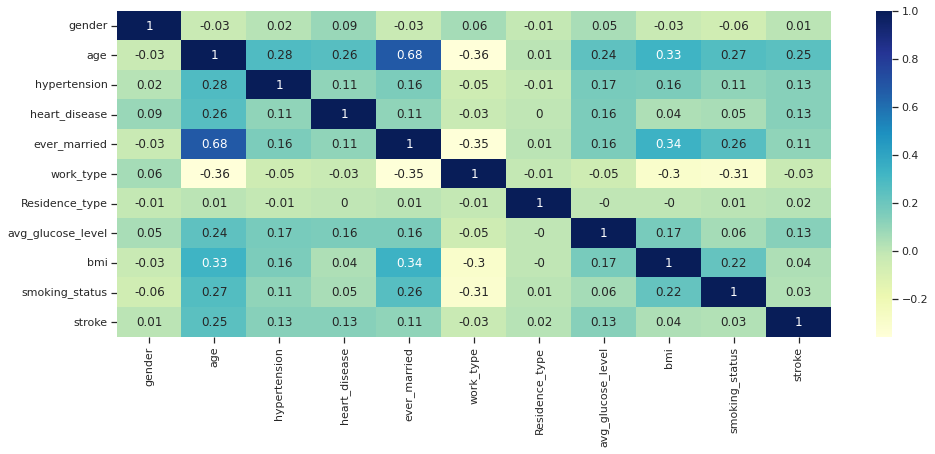

In [34]:
plt.figure(figsize=(16, 6))
correlated_features=stroke_data.corr().round(2)
sns.heatmap(correlated_features,cmap='YlGnBu',annot=True)

plt.show()

### There are some values in smoking status unknown so we replace it by null to be handled as missing values after label encoder unknown=0 then take the mean of null values of the attribute

In [35]:
stroke_data['smoking_status'].replace(0, np.nan, inplace=True)
stroke_data['smoking_status'].fillna(stroke_data['smoking_status'].mean(), inplace = True)
stroke_data

gender   age  hypertension  heart_disease  ever_married  work_type  \
0          1  67.0             0              1             1          2   
1          0  61.0             0              0             1          3   
2          1  80.0             0              1             1          2   
3          0  49.0             0              0             1          2   
4          0  79.0             1              0             1          3   
...      ...   ...           ...            ...           ...        ...   
5105       0  80.0             1              0             1          2   
5106       0  81.0             0              0             1          3   
5107       0  35.0             0              0             1          3   
5108       1  51.0             0              0             1          2   
5109       0  44.0             0              0             1          0   

      Residence_type  avg_glucose_level        bmi  smoking_status  stroke  
0                  1             228.69  36.600000        1.000000       1  
1                  0             202.21  28.893237        2.000000       1  
2                  0             105.92  32.500000        2.000000       1  
3                  1             171.23  34.400000        3.000000       1  
4                  0             174.12  24.000000        2.000000       1  
...              ...                ...        ...             ...     ...  
5105               1              83.75  28.893237        2.000000       0  
5106               1             125.20  40.000000        2.000000       0  
5107               0              82.99  30.600000        2.000000       0  
5108               0             166.29  25.600000        1.000000       0  
5109               1              85.28  26.200000        1.973352       0  

[5109 rows x 11 columns]

### Variables measured at different scales do not apply equally to model fitting and may result in bias so we need the standard scaler to convert the continous features into same scale

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric_cols = ['age', 'avg_glucose_level', 'bmi']
stroke_data[numeric_cols] = scaler.fit_transform(stroke_data[numeric_cols])
stroke_data

gender       age  hypertension  heart_disease  ever_married  work_type  \
0          1  1.051242             0              1             1          2   
1          0  0.785889             0              0             1          3   
2          1  1.626174             0              1             1          2   
3          0  0.255182             0              0             1          2   
4          0  1.581949             1              0             1          3   
...      ...       ...           ...            ...           ...        ...   
5105       0  1.626174             1              0             1          2   
5106       0  1.670400             0              0             1          3   
5107       0 -0.363976             0              0             1          3   
5108       1  0.343633             0              0             1          2   
5109       0  0.034054             0              0             1          0   

      Residence_type  avg_glucose_level       bmi  smoking_status  stroke  
0                  1           2.706450  1.001041        1.000000       1  
1                  0           2.121652 -0.000165        2.000000       1  
2                  0          -0.004867  0.468399        2.000000       1  
3                  1           1.437473  0.715233        3.000000       1  
4                  0           1.501297 -0.635858        2.000000       1  
...              ...                ...       ...             ...     ...  
5105               1          -0.494481 -0.000165        2.000000       0  
5106               1           0.420922  1.442744        2.000000       0  
5107               0          -0.511266  0.221565        2.000000       0  
5108               0           1.328375 -0.427998        1.000000       0  
5109               1          -0.460692 -0.350051        1.973352       0  

[5109 rows x 11 columns]

### Partioing data into input features and the target (output) to begin train and test the data

In [37]:
input_features = stroke_data.drop('stroke', axis = 1)
target = stroke_data['stroke']

# Splitting the data for train and test to be ready to the classification

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(input_features, target, test_size=0.3, random_state=500)

In [41]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(3576, 10)
(3576,)
(1533, 10)
(1533,)


#  **Classification** (Decision Tree)
## A Decision Tree is Supervised Machine Learning where the data is continuously split according to a certain parameter.

Decision Tree consists of :
Nodes : Test for the value of a certain attribute.
Edges/ Branch : Correspond to the outcome of a test and connect to the next node or leaf.
Leaf nodes : Terminal nodes that predict the outcome (represent class labels)
 
 we start at the tree root and split the data on the feature that results in the **largest information gain (IG)**
In an iterative process, we can then repeat this splitting procedure at each child node until the leaves are **pure**


In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import fbeta_score, roc_curve, roc_auc_score, recall_score,f1_score
from sklearn.metrics import precision_score, accuracy_score, make_scorer
from sklearn.metrics import classification_report, plot_confusion_matrix

DT = DecisionTreeClassifier(random_state = 500)
DT.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=500)

## **Before Hypertuning** we trained the classifer and visualize the output of the decision tree and there is alot of levels that means it may overfitting that way it may has a high accuarcy 

In [44]:
DT.score(X_test,Y_test)

0.9080234833659491

### Evaluation of the model before any hypertuning

In [45]:
y_predict = DT.predict(X_test)
print(classification_report(Y_test, y_predict))


              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1452
           1       0.13      0.14      0.13        81

    accuracy                           0.91      1533
   macro avg       0.54      0.54      0.54      1533
weighted avg       0.91      0.91      0.91      1533



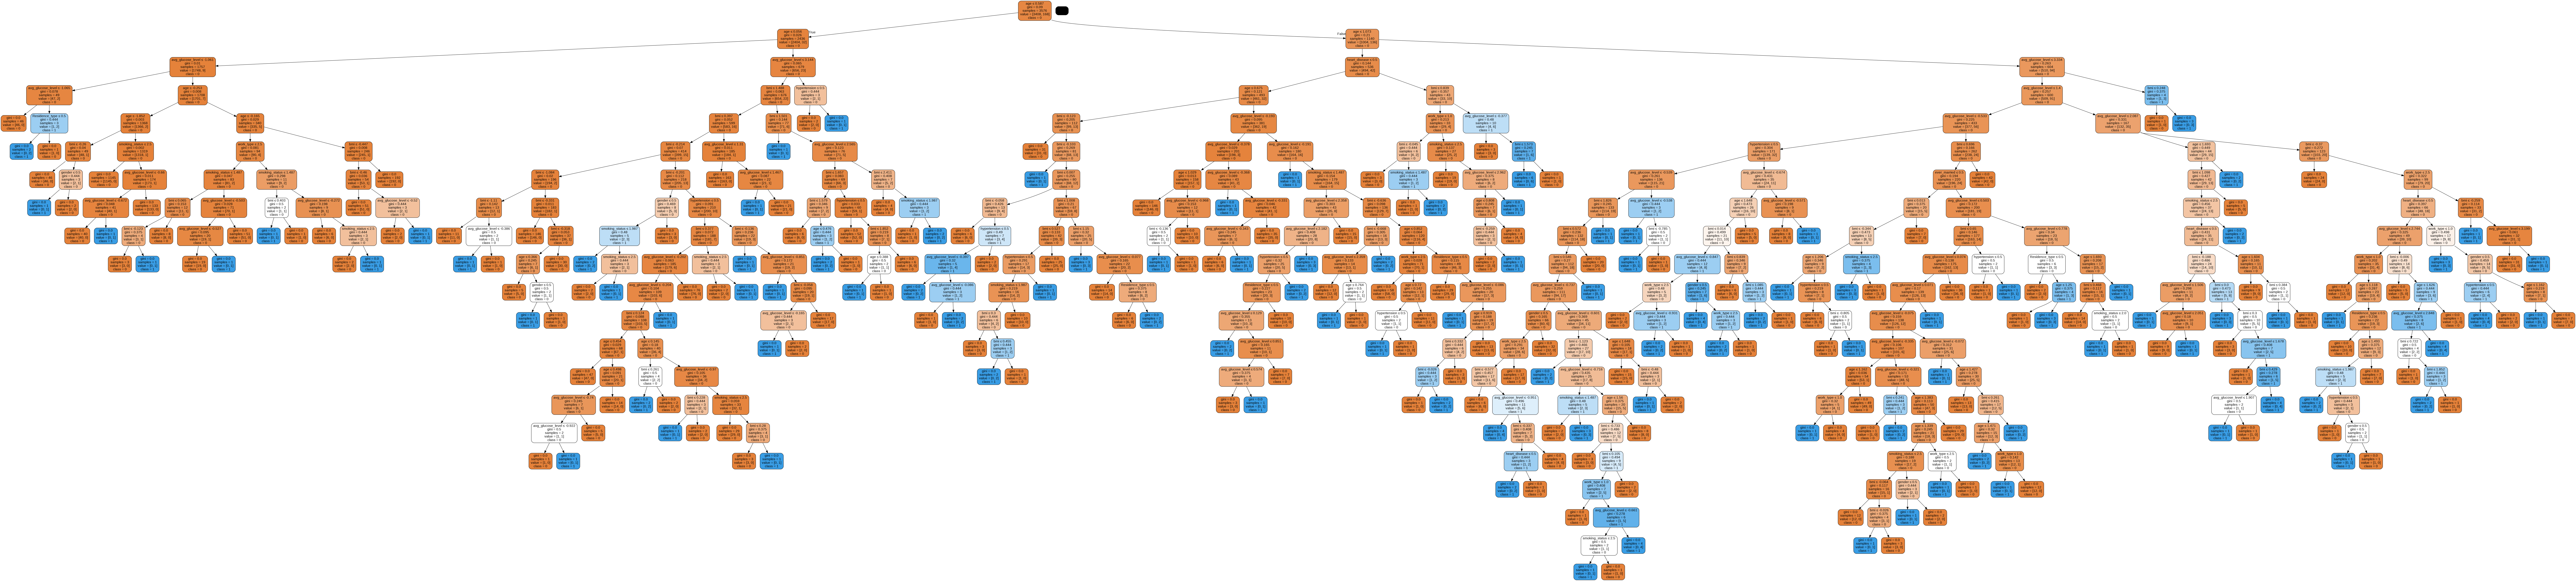

In [46]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

Names_Features=['gender','age','hypertension'	, 'heart_disease','ever_married' ,'work_type'	,'Residence_type' , 'avg_glucose_level'	, 'bmi'	,'smoking_status'	]
classes=['0','1']
dot_data = StringIO()
export_graphviz(DT, out_file=dot_data, feature_names=Names_Features, class_names=classes ,
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# **After Hypertuning**

In [ ]:
The method for performing a K-FOLD Cross Validation is as follows:

K-1 of the folds is used as training data for the model.
On the rest of the data, the resulting model is validated.